<a href="https://colab.research.google.com/github/JayanthPrudhivi6/JayanthPrudhivi_INFO5502_Spring2022/blob/main/lab_assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The seventh Lab-assignment (03/31/2022, 50 points in total)

The purpose of this exercise is to build several regression models based on real-world datasets. 

### Question 1 (25 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

In [99]:


### You code here

import pandas as pd

dframe = pd.read_csv("/content/portfolio_data.csv")
dframe.head()





,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


RMSE score is 21.490743645979293
R2 Score is 0.9594274478668643


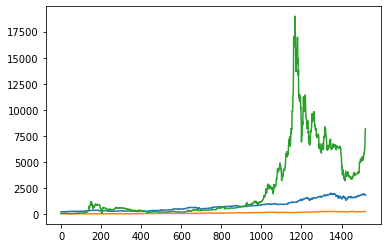

In [101]:
x = dframe.drop(['Date', 'NFLX'], axis = 1)
y = dframe['NFLX']
import matplotlib.pyplot as plt
plt.plot(x)
#spliting the  data according to  train and test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size = 0.35, random_state = 0)

lm = LinearRegression()
lm.fit(xtrain, ytrain)

ypred = lm.predict(xtest)
print("RMSE score is",np.sqrt(mean_squared_error(ytest, ypred)))
print("R2 Score is", r2_score(ytest, ypred))

In [102]:
from sklearn.ensemble import RandomForestRegressor

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 0)
rfreg = RandomForestRegressor(random_state=211)
rfreg.fit(xtrain, ytrain)

rfregpred = rfreg.predict(xtest)
print("RMSE Score :",np.sqrt(mean_squared_error(ytest, rfregpred)))
print("R2 Score :", r2_score(ytest, rfregpred))

RMSE Score : 12.10571314751485
R2 Score : 0.9873076848275778


In [103]:
pip install keras

In [104]:
pip install tensorflow

In [105]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Here LSTM model is built
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(xtrain, ytrain, batch_size=1, epochs=15)

Epoch 1/15
1064/1064 [==============================] - 12s 7ms/step - loss: 6795.6147
Epoch 2/15
1064/1064 [==============================] - 8s 8ms/step - loss: 1605.6971
Epoch 3/15
1064/1064 [==============================] - 8s 7ms/step - loss: 1196.2701
Epoch 4/15
1064/1064 [==============================] - 8s 8ms/step - loss: 1105.1824
Epoch 5/15
1064/1064 [==============================] - 9s 8ms/step - loss: 1089.0724
Epoch 6/15
1064/1064 [==============================] - 9s 8ms/step - loss: 984.3379
Epoch 7/15
1064/1064 [==============================] - 10s 9ms/step - loss: 877.0065
Epoch 8/15
1064/1064 [==============================] - 8s 8ms/step - loss: 935.2360
Epoch 9/15
1064/1064 [==============================] - 5s 4ms/step - loss: 877.3569
Epoch 10/15
1064/1064 [==============================] - 4s 4ms/step - loss: 1033.7380
Epoch 11/15
1064/1064 [==============================] - 4s 4ms/step - loss: 810.9060
Epoch 12/15
1064/1064 [==============================] 

### Question 2 (25 points) The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets. Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset. The dataset can be downloaded here: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/Twitter%20Sentiment%20Analysis. Please build a logistic regression model for the classification, evaluation metrics include accuracy, precision, recall, and F-1 score need to be reported. 

In [106]:
### You code here:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re

dframe1 = pd.read_csv("/content/train.csv")
dframe1.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [107]:
dframe_hate = dframe1[dframe1.label == 1]
dframe_hate.head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [108]:
dframe1_normal = dframe1[dframe1.label == 0]
dframe1_normal.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [109]:
def process_tweet(tweet):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())

In [110]:
dframe1['processed_tweets'] = dframe1['tweet'].apply(process_tweet)
dframe1.head()

,id,label,tweet,processed_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause they ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [111]:
cnt_non_fraud = dframe1[dframe1['label'] == 0]['processed_tweets'].count()
df_class_fraud = dframe1[dframe1['label'] == 1]
df_class_nonfraud = dframe1[dframe1['label'] == 0]
df_class_fraud_oversample = df_class_fraud.sample(cnt_non_fraud, replace=True)
df_oversampled = pd.concat([df_class_nonfraud, df_class_fraud_oversample], axis=0)

print('Random Over Sampling :')
print(df_oversampled['label'].value_counts())

Random Over Sampling :
0    29720
1    29720
Name: label, dtype: int64


In [112]:
from sklearn.model_selection import train_test_split
X = df_oversampled['processed_tweets']
y = df_oversampled['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, stratify = None)

In [113]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [114]:
x_train_counts = count_vect.fit_transform(X_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

In [115]:
x_test_counts = count_vect.transform(X_test)
x_test_tfidf = transformer.transform(x_test_counts)

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
logreg = LogisticRegression(random_state=0)

In [118]:
logreg.fit(x_train_tfidf,y_train)

LogisticRegression(random_state=0)

In [119]:
predict_log = logreg.predict(x_test_tfidf)

In [120]:
df_test = pd.read_csv("/content/test.csv")
df_test['process_tweets'] = df_test['tweet'].apply(process_tweet)
X = df_test['process_tweets']
x_test_counts = count_vect.transform(X)
x_test_tfidf = transformer.transform(x_test_counts)
df_test['predict'] = logreg.predict(x_test_tfidf)
df_test.head()

,id,tweet,process_tweets,predict
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...,0
1,31964,@user #white #supremacists want everyone to s...,white supremacists want everyone to see the ne...,1
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your acne altwaystoheal heal...,0
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",3rd bihday to my amazing hilarious nephew eli ...,0


In [121]:
print("Confusion matrix :")
print(confusion_matrix(y_test,predict_log))
print("Classification Report :")
print(classification_report(y_test, predict_log))

Confusion matrix :
[[ 9850   483]
 [  131 10340]]
Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     10333
           1       0.96      0.99      0.97     10471

    accuracy                           0.97     20804
   macro avg       0.97      0.97      0.97     20804
weighted avg       0.97      0.97      0.97     20804

